In [1]:
%matplotlib inline
import pandas as pd
import pylab as plt
import numpy as np

In [2]:
ip_data = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [3]:
ip_data.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


1. Check for missing values

In [9]:
ip_data['A7'].replace('?', np.NaN)

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23     NaN
24       1
25       7
26       1
27       1
28       1
29       1
      ... 
669      5
670      8
671      1
672      1
673      1
674      1
675      1
676      1
677      1
678      1
679      1
680     10
681     10
682      1
683      1
684      1
685      1
686      1
687      1
688      1
689      1
690      1
691      5
692      1
693      1
694      2
695      1
696      3
697      4
698      5
Name: A7, dtype: object

In [10]:
ip_data['A7'] = pd.to_numeric(ip_data['A7'], errors='coerce')

In [15]:
print(pd.isnull(ip_data).sum())

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
CLASS     0
dtype: int64


There are 16 NaN types in column A7

Replacing all Nan type with column mean

In [20]:
ip_data = ip_data.apply(lambda x: x.fillna(x.mean(skipna=True)))

Summary statistics of the input data

In [26]:
ip_data.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Number of data observations in the input data

In [38]:
print('There are rows:%d and cols:%d in input data' %(ip_data.shape[0], ip_data.shape[1]))

There are rows:699 and cols:11 in input data


unique id values (column Scn)

In [39]:
print('Number of unique ids in input data: ',len(ip_data.Scn.unique()))

Number of unique ids in input data:  645


Histogram of columns A2-A10

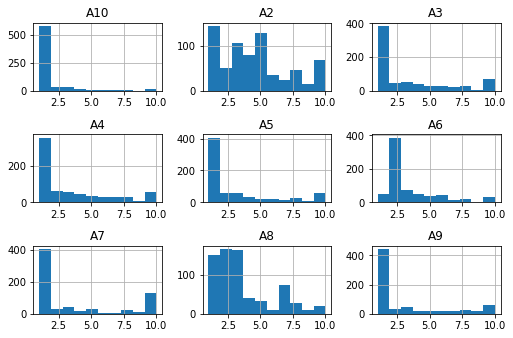

In [56]:
exc = ['Scn', 'CLASS']
ip_data.ix[:, ip_data.columns.difference(exc)].hist()
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

Bar plot of column CLASS grouped by value_count

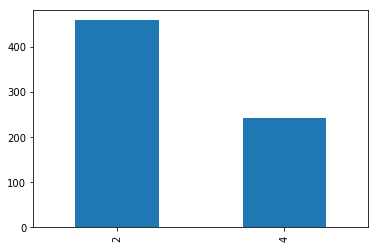

In [46]:
pd.value_counts(ip_data['CLASS']).plot.bar()
plt.show()

In [40]:
#Check for correlation
ip_data.corr(method='pearson')

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
Scn,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098668,-0.060051,-0.052072,-0.034901,-0.080226
A2,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
A3,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
A4,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
A5,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
A6,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
A7,-0.098668,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
A8,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
A9,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
A10,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170


Scatter plot for columns A3 and A4

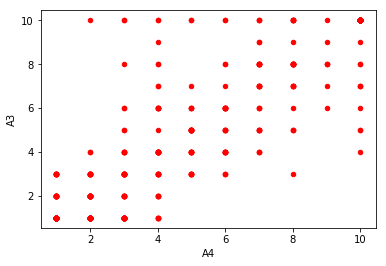

In [44]:
ip_data.plot(kind='scatter',x='A4',y='A3',color='red')
plt.show()

Inferences from initial analysis:

1. As we can see from the basic stats columns - A3, A7, A9 has higher standard deviation and thus we can normalize these columns for better results.

2. Also we can see from the correlation matrix that there are columns with very high correlation value e.g., columns A3 and A4. Hence one from each pair can be ommited from the inclusion into the final model which will yeild models of lower complexity. Thus improving their performance. 